# visualize or_matseg dataset

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


100%|██████████| 1/1 [00:00<00:00, 9198.04it/s]

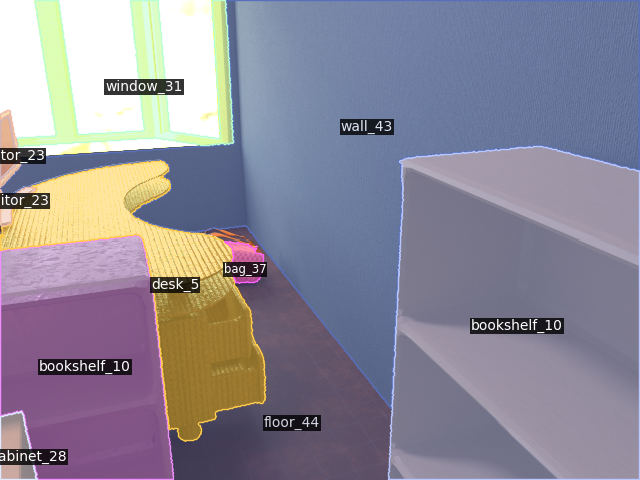

In [63]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import sys
import os
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
# print(sys.path)

# from mask2former.data.datasets.register_or_matseg_sem_panoptic import register_all_or_matseg_sem_panoptic
# _root = os.getenv("DETECTRON2_DATASETS", "../datasets")
# register_all_or_matseg_sem_panoptic(_root)

from detectron2.data import MetadataCatalog, DatasetCatalog
from panopticapi import utils as panopticapi_utils
or_matseg_sem_panoptic_metadata = MetadataCatalog.get("or_matseg_sem_panoptic_train")

from mask2former.data.datasets.register_or_matseg_sem_panoptic import load_or_matseg_sem_panoptic_json, get_metadata
metadata = get_metadata()
panoptic_json = '/data/OpenRooms_public/im_matseg_sem_pan_seg_rgb_train.json'
assert Path(panoptic_json).exists(), panoptic_json
image_root = '/data/OpenRooms_public'
panoptic_root = '/data/OpenRooms_public/im_matseg_sem_pan_seg_rgb'

dataset_dicts = load_or_matseg_sem_panoptic_json(
    panoptic_json, image_root, panoptic_root, metadata
)

import random
import cv2
from detectron2.utils.visualizer import Visualizer
from google.colab.patches import cv2_imshow

# for d in random.sample(dataset_dicts, 1):
# d = dataset_dicts[0]
for d in dataset_dicts[0:1]:
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=or_matseg_sem_panoptic_metadata, scale=1)
    out = visualizer.draw_dataset_dict(d)
    cv2_imshow(out.get_image()[:, :, ::-1])

    pan_seg_file_name = d['pan_seg_file_name']
    assert Path(pan_seg_file_name).exists()


In [58]:
d

{'file_name': '/data/OpenRooms_public/mainDiffLight_xml1/scene0457_01/im_sdr/im_1.png',
 'image_id': 0,
 'pan_seg_file_name': '/data/OpenRooms_public/im_matseg_sem_pan_seg_rgb/main_xml1/scene0457_01/im_matseg_sem_pan_seg_rgb_1.png',
 'segments_info': [{'id': 1,
   'category_id': 4,
   'iscrowd': 0,
   'isthing': True,
   'isstuff': 0,
   'area': 21864.0},
  {'id': 2,
   'category_id': 17,
   'iscrowd': 0,
   'isthing': True,
   'isstuff': 0,
   'area': 14620.0},
  {'id': 3,
   'category_id': 20,
   'iscrowd': 0,
   'isthing': True,
   'isstuff': 0,
   'area': 7455.0},
  {'id': 4,
   'category_id': 20,
   'iscrowd': 0,
   'isthing': True,
   'isstuff': 0,
   'area': 9246.0},
  {'id': 5,
   'category_id': 20,
   'iscrowd': 0,
   'isthing': True,
   'isstuff': 0,
   'area': 468.0},
  {'id': 6,
   'category_id': 30,
   'iscrowd': 0,
   'isthing': True,
   'isstuff': 0,
   'area': 42875.0},
  {'id': 7,
   'category_id': 42,
   'iscrowd': 0,
   'isthing': True,
   'isstuff': 1,
   'area': 15

[ 0  1  2  3  4  5  6  7  8  9 10]
{'id': 1, 'category_id': 4, 'iscrowd': 0, 'isthing': True, 'isstuff': 0, 'area': 27276.0}
desk_5


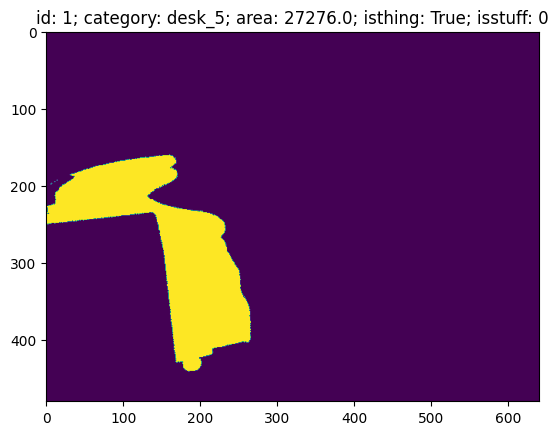

{'id': 2, 'category_id': 9, 'iscrowd': 0, 'isthing': True, 'isstuff': 0, 'area': 79378.0}
bookshelf_10


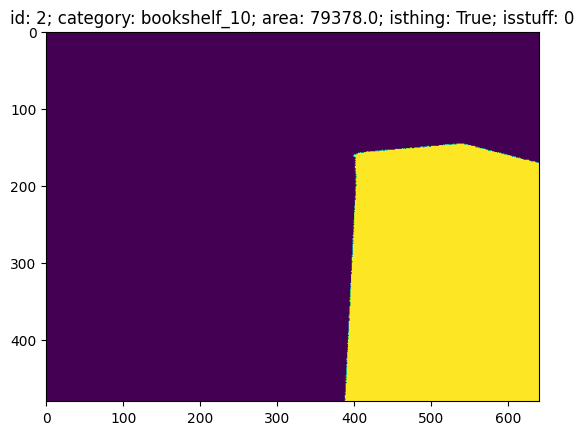

{'id': 3, 'category_id': 9, 'iscrowd': 0, 'isthing': True, 'isstuff': 0, 'area': 36135.0}
bookshelf_10


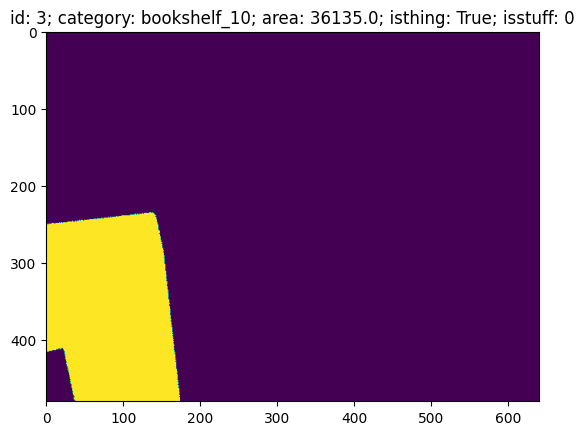

{'id': 4, 'category_id': 22, 'iscrowd': 0, 'isthing': True, 'isstuff': 0, 'area': 930.0}
monitor_23


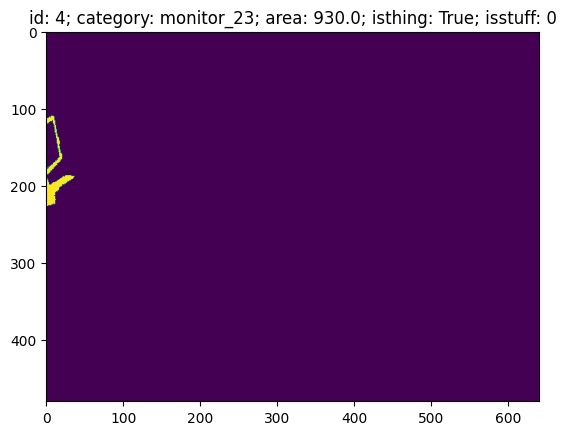

{'id': 5, 'category_id': 22, 'iscrowd': 0, 'isthing': True, 'isstuff': 0, 'area': 763.0}
monitor_23


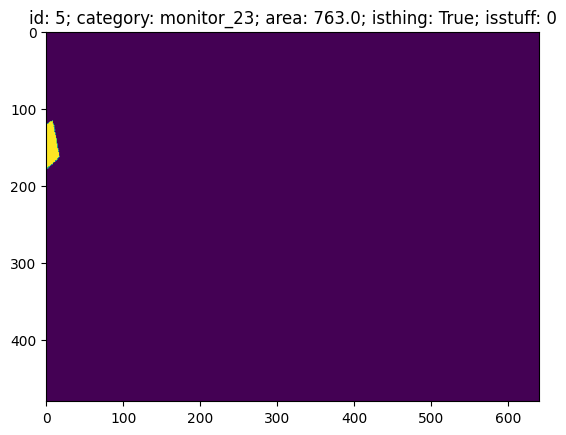

{'id': 6, 'category_id': 27, 'iscrowd': 0, 'isthing': True, 'isstuff': 0, 'area': 1994.0}
file_cabinet_28


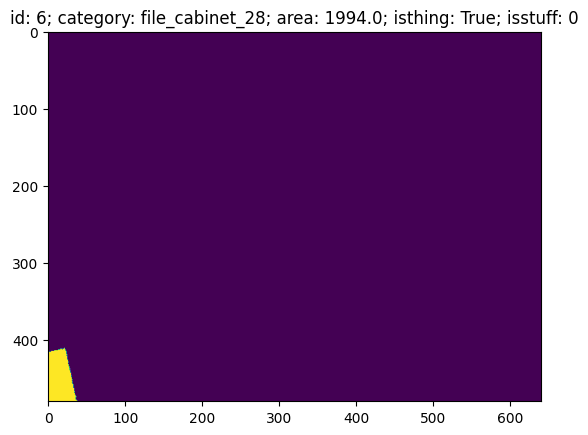

{'id': 7, 'category_id': 30, 'iscrowd': 0, 'isthing': True, 'isstuff': 0, 'area': 10601.0}
window_31


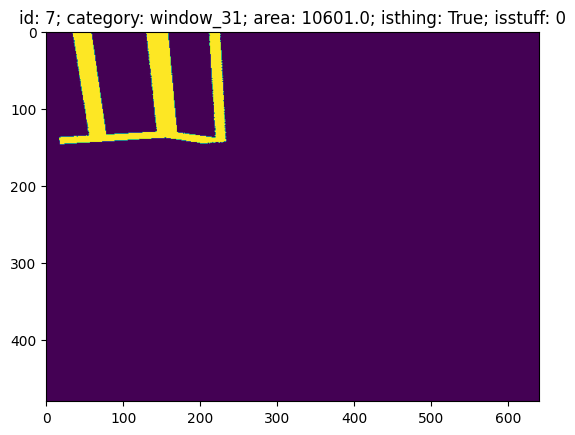

{'id': 8, 'category_id': 36, 'iscrowd': 0, 'isthing': True, 'isstuff': 0, 'area': 1148.0}
bag_37


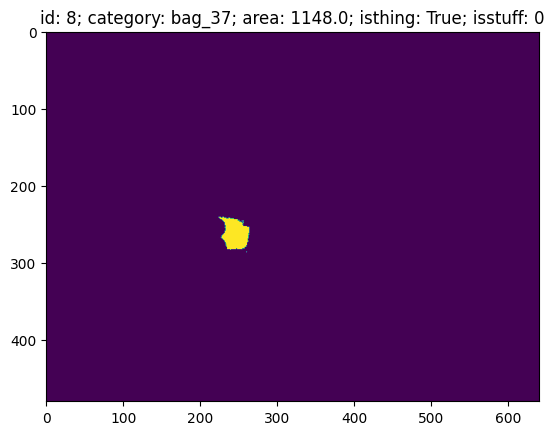

{'id': 9, 'category_id': 42, 'iscrowd': 0, 'isthing': True, 'isstuff': 1, 'area': 98910.0}
wall_43


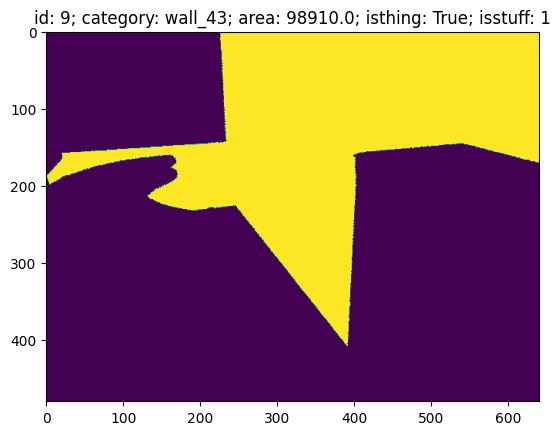

{'id': 10, 'category_id': 43, 'iscrowd': 0, 'isthing': False, 'isstuff': 1, 'area': 26235.0}
floor_44


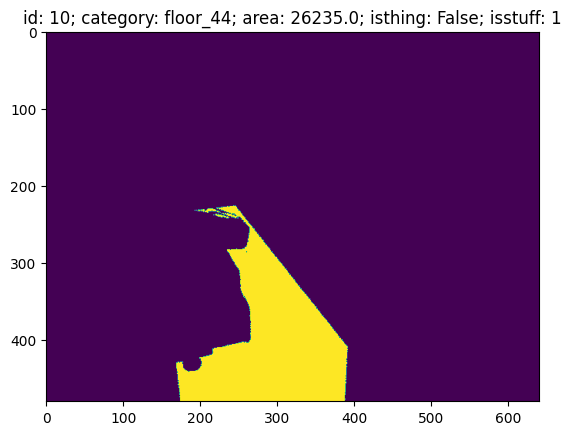

In [64]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
d = dataset_dicts[0]
im_pan_seg_rgb = cv2.imread(d.get('pan_seg_file_name'))[:, :, ::-1].astype(np.int16)
im_pan_seg_ids = panopticapi_utils.rgb2id(im_pan_seg_rgb)
from datasets.prepare_or_pan_seg import OR_SEM_SEG_CATEGORIES

print(np.unique(im_pan_seg_ids))

for _ in np.unique(im_pan_seg_ids):
    if _ == 0: continue
    plt.figure()
    plt.imshow(im_pan_seg_ids == _)
    segment_info_match = [__ for __ in d['segments_info'] if __['id'] == _]
    assert len(segment_info_match) == 1
    segment_info = segment_info_match[0]
    print(segment_info)
    # assert segment_info['id'] == _
    category_id = segment_info['category_id']
    print(OR_SEM_SEG_CATEGORIES[category_id])
    plt.title('id: {}; '.format(_) + 'category: {}; '.format(OR_SEM_SEG_CATEGORIES[category_id]) + 'area: {}; '.format(segment_info['area']) + 'isthing: {}; '.format(segment_info['isthing']) + 'isstuff: {}'.format(segment_info['isstuff']))
    plt.show()
